In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')
import gc

from tqdm import tqdm_notebook
import matplotlib
# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches

from plotly import tools, subplots
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
pd.set_option('max_columns', 100)
pd.set_option('max_rows', 30)

from datetime import datetime
py.init_notebook_mode(connected=True)
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

path='../input/ashrae-energy-prediction/'


import os
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

../input/ashrae-energy-prediction/building_metadata.csv
../input/ashrae-energy-prediction/weather_train.csv
../input/ashrae-energy-prediction/sample_submission.csv
../input/ashrae-energy-prediction/weather_test.csv
../input/ashrae-energy-prediction/test.csv
../input/ashrae-energy-prediction/train.csv


In [2]:
train = pd.read_csv(f'{path}train.csv')
test = pd.read_csv(f'{path}train.csv')

weather_train = pd.read_csv(f'{path}weather_train.csv')
weather_test = pd.read_csv(f'{path}weather_test.csv')

building_metadata = pd.read_csv(f'{path}building_metadata.csv')


In [3]:
building_id = np.sort(train['building_id'].unique())
train['timestamp'] = pd.to_datetime(train['timestamp'],format='%Y-%m-%d %H:%M:%S')
test['timestamp'] = pd.to_datetime(test['timestamp'],format='%Y-%m-%d %H:%M:%S')

In [4]:
num_meter = []
for build in tqdm_notebook(building_id):
    num_meter += [len(train[train['building_id']==build]['meter'].unique())]
num_meter = np.array(num_meter)
print('Number of build with :\n4 different meter: {}\n3 different meter: {}\n2 different meter: {}\n1 different meter: {}'.format(sum(num_meter==4),sum(num_meter==3),sum(num_meter==2),sum(num_meter==1)))


Number of build with :
4 different meter: 13
3 different meter: 331
2 different meter: 230
1 different meter: 875


In [5]:
type_meter = []
met_list = np.sort(train['meter'].unique().copy())
for met in met_list:
    type_meter += [len(train[train['meter']==met]['building_id'].unique())]
type_meter = np.array(type_meter)
print('Number of build with :\nElectricity: {}\nChilledwater: {}\nSteam: {}\nHotwater: {}'.format(type_meter[0],type_meter[1],type_meter[2],type_meter[3]))

Number of build with :
Electricity: 1413
Chilledwater: 498
Steam: 324
Hotwater: 145


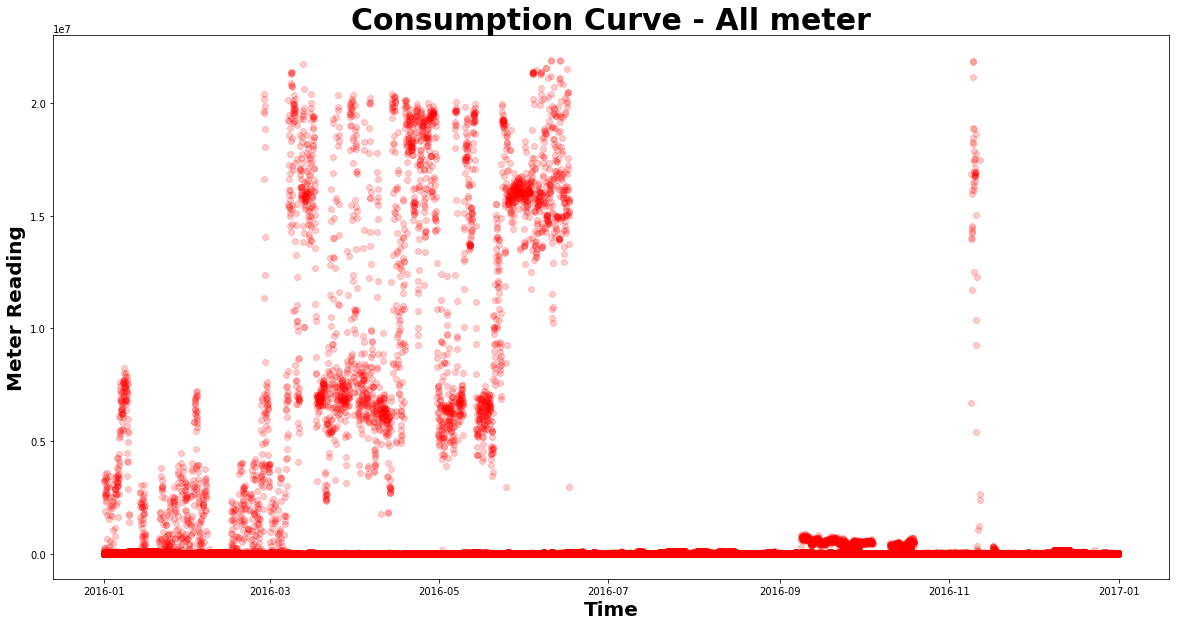

In [6]:
dates = matplotlib.dates.date2num(train['timestamp'].copy())

plt.figure(figsize=(20,10))

for build in tqdm_notebook(building_id):
    plt.plot_date(dates[train['building_id']==build],train[train['building_id']==build]['meter_reading'],color='red',alpha=.2)

# Add title and x, y labels
plt.title("Consumption Curve - All meter", fontsize=30, fontweight='bold')
plt.xlabel("Time",fontsize=20, fontweight='bold')
plt.ylabel("Meter Reading",fontsize=20, fontweight='bold')
plt.show()


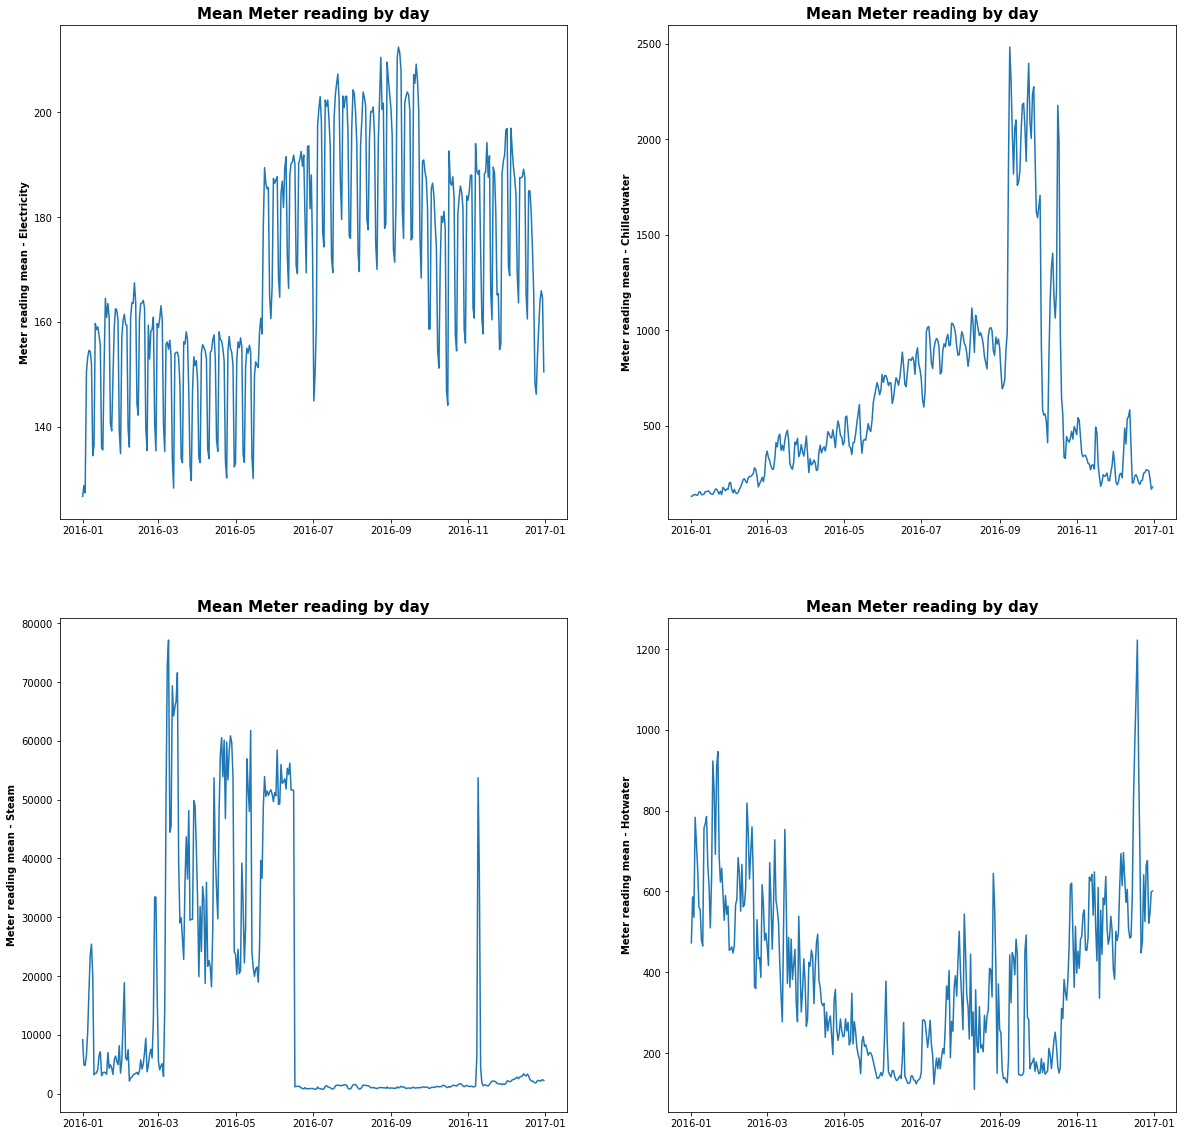

In [7]:
fig, ax = plt.subplots(2, 2,figsize=(20,20))
met_list = [(0,'Electricity'),(1,'Chilledwater'), (2,'Steam'), (3,'Hotwater')]
iteration = 0
for row in ax:
    for col in row:
        col.plot(train.loc[train['meter']==met_list[iteration][0],['timestamp','meter_reading']].set_index('timestamp').resample('D').mean()['meter_reading'])
        col.set_ylabel('Meter reading mean - {}'.format(met_list[iteration][1]), fontsize=10,fontweight='bold')
        col.set_title('Mean Meter reading by day',  fontsize=15,fontweight='bold')
        iteration +=1
plt.show()

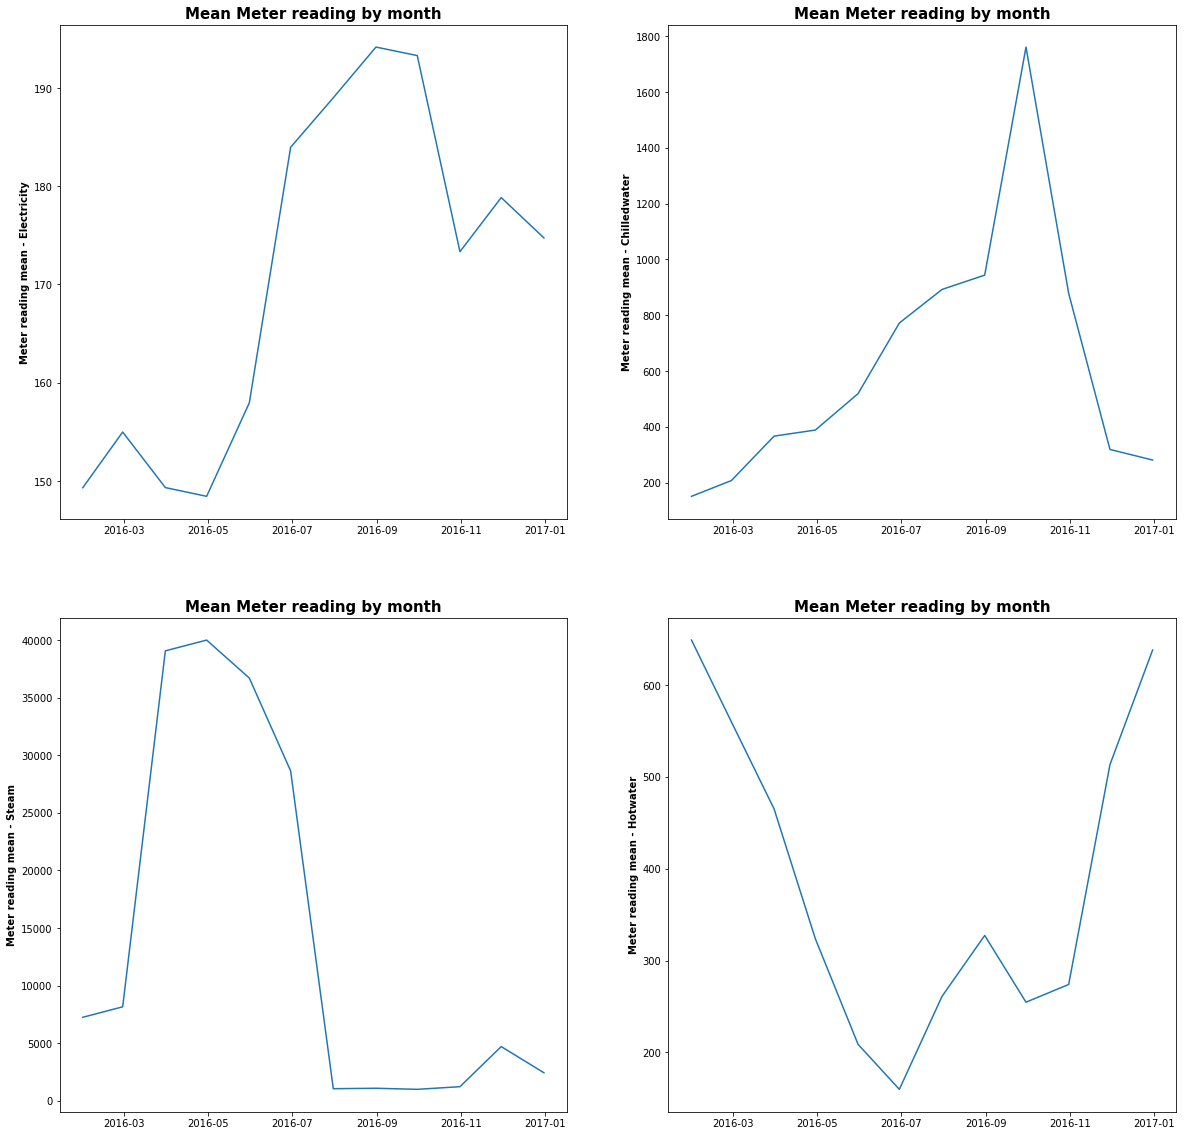

In [8]:
fig, ax = plt.subplots(2, 2,figsize=(20,20))
met_list = [(0,'Electricity'),(1,'Chilledwater'), (2,'Steam'), (3,'Hotwater')]
iteration = 0
for row in ax:
    for col in row:
        col.plot(train.loc[train['meter']==met_list[iteration][0],['timestamp','meter_reading']].set_index('timestamp').resample('M').mean()['meter_reading'])
        col.set_ylabel('Meter reading mean - {}'.format(met_list[iteration][1]), fontsize=10,fontweight='bold')
        col.set_title('Mean Meter reading by month',  fontsize=15,fontweight='bold')
        iteration +=1
plt.show()

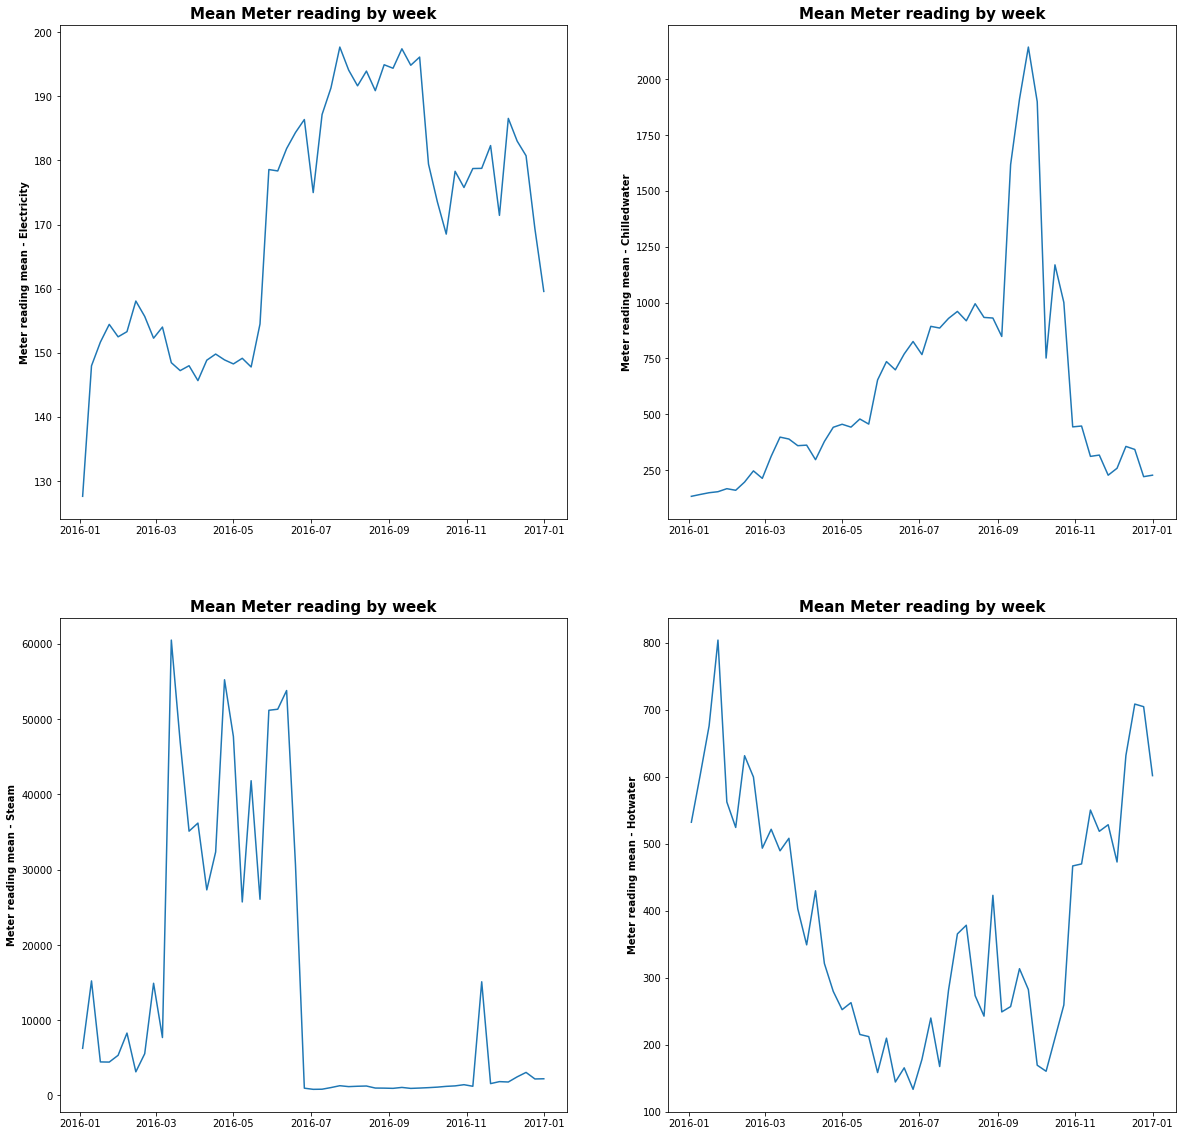

In [9]:
fig, ax = plt.subplots(2, 2,figsize=(20,20))
met_list = [(0,'Electricity'),(1,'Chilledwater'), (2,'Steam'), (3,'Hotwater')]
iteration = 0
for row in ax:
    for col in row:
        col.plot(train.loc[train['meter']==met_list[iteration][0],['timestamp','meter_reading']].set_index('timestamp').resample('W').mean()['meter_reading'])
        col.set_ylabel('Meter reading mean - {}'.format(met_list[iteration][1]), fontsize=10,fontweight='bold')
        col.set_title('Mean Meter reading by week',  fontsize=15,fontweight='bold')
        iteration +=1
plt.show()

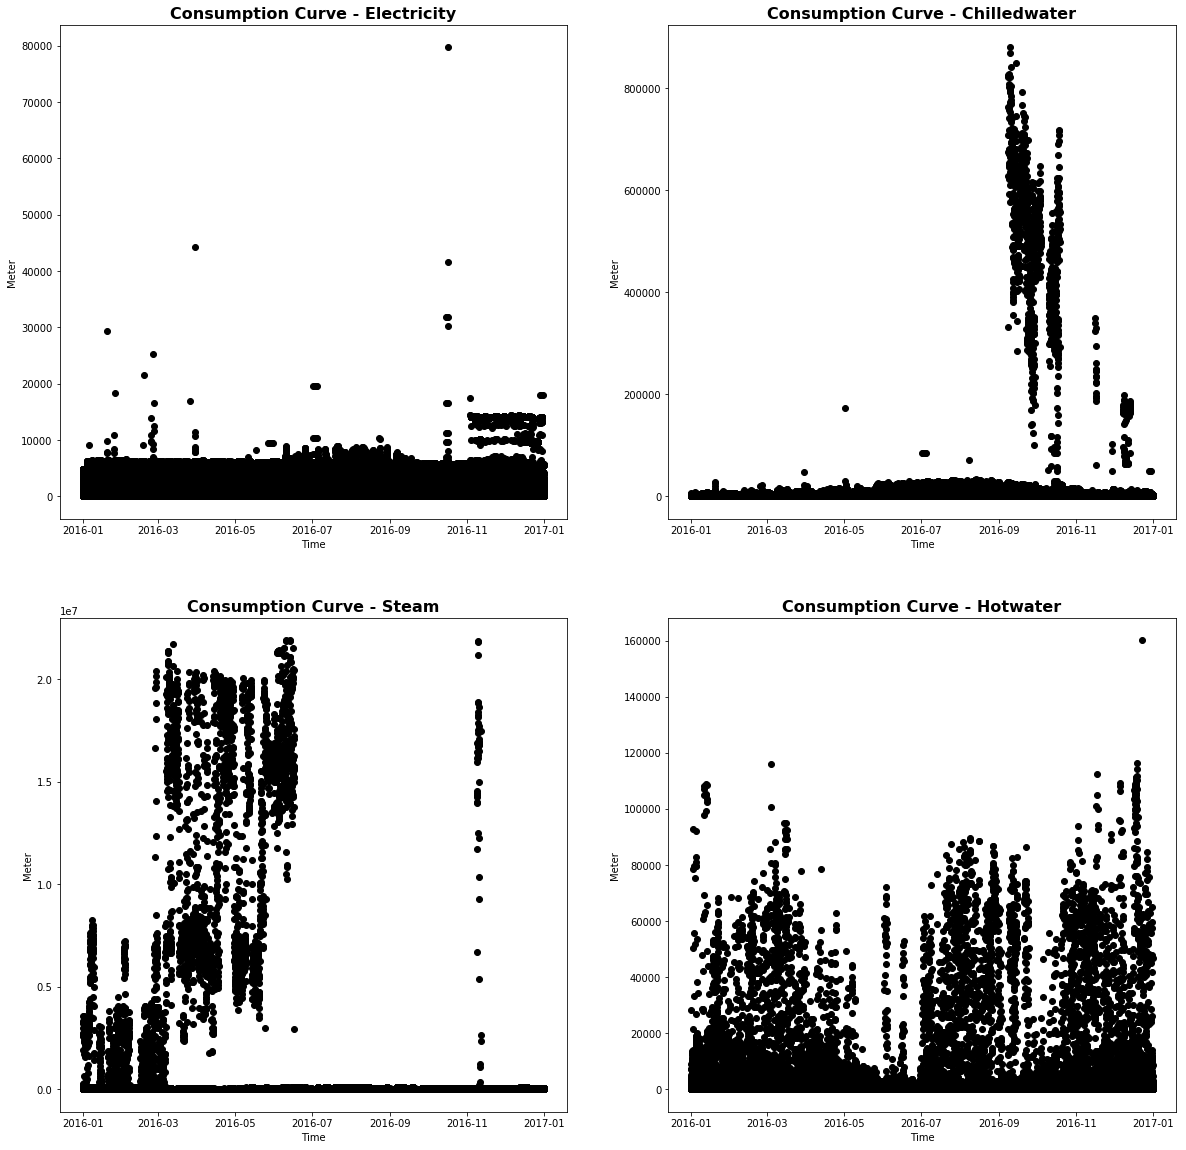

In [10]:
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(20,20))
met_list = [(0,'Electricity'),(1,'Chilledwater'), (2,'Steam'), (3,'Hotwater')]
iteration = 0
for row in ax:
    for col in row:
        mask_1 = train['meter']==met_list[iteration][0]
        for build in tqdm_notebook(building_id):
            mask_2 = (train['building_id']==build) & (mask_1)
            col.plot_date(dates[mask_2],train.loc[mask_2,'meter_reading'],color='black')

        col.set_title("Consumption Curve - {}".format(met_list[iteration][1]), fontsize=16, fontweight='bold')
        col.set_xlabel("Time")
        col.set_ylabel("Meter")
        iteration +=1

plt.show()



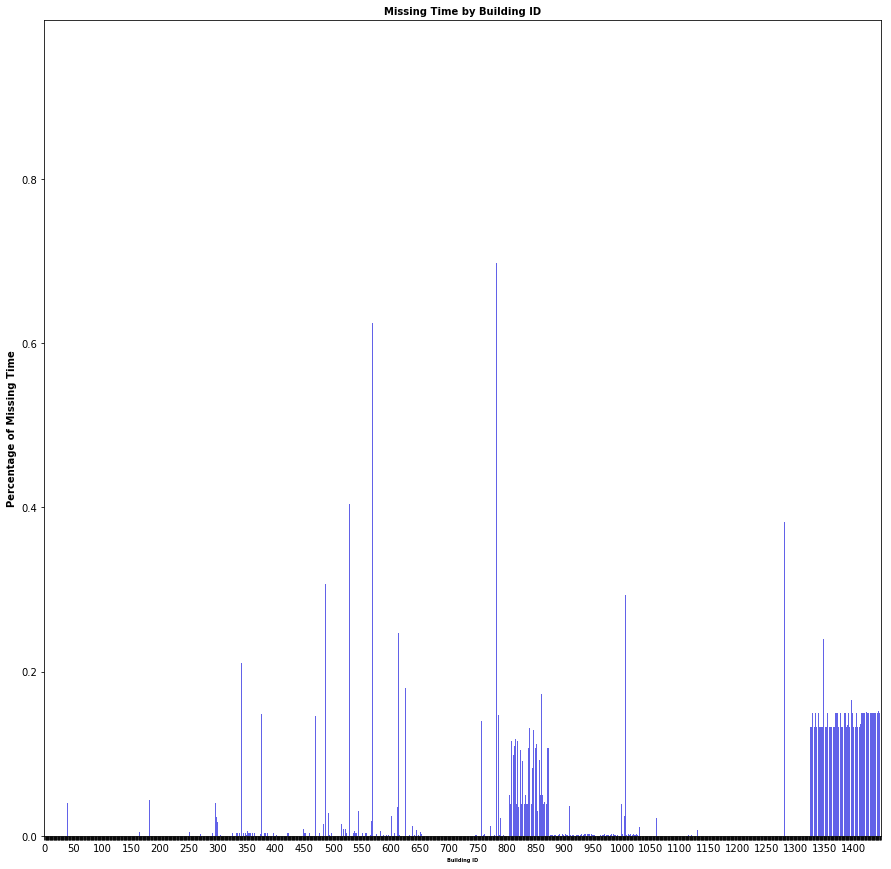

In [11]:
number_day = train['timestamp'].nunique()
number_build_day = []
for build in tqdm_notebook(building_id):
    number_build_day += [(number_day-train.loc[train['building_id']==build,'timestamp'].nunique())/number_day]
number_build_day = np.array(number_build_day)

plt.figure(figsize=(15,15))

ax = sns.barplot(x=building_id,y=number_build_day,color='blue',alpha=.7)
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 50 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

ax.set_xlabel('Building ID',fontsize=5,fontweight='bold')
ax.set_ylabel('Percentage of Missing Time',fontsize=10,fontweight='bold')
ax.set_title("Missing Time by Building ID", fontsize=10, fontweight='bold')

plt.show()


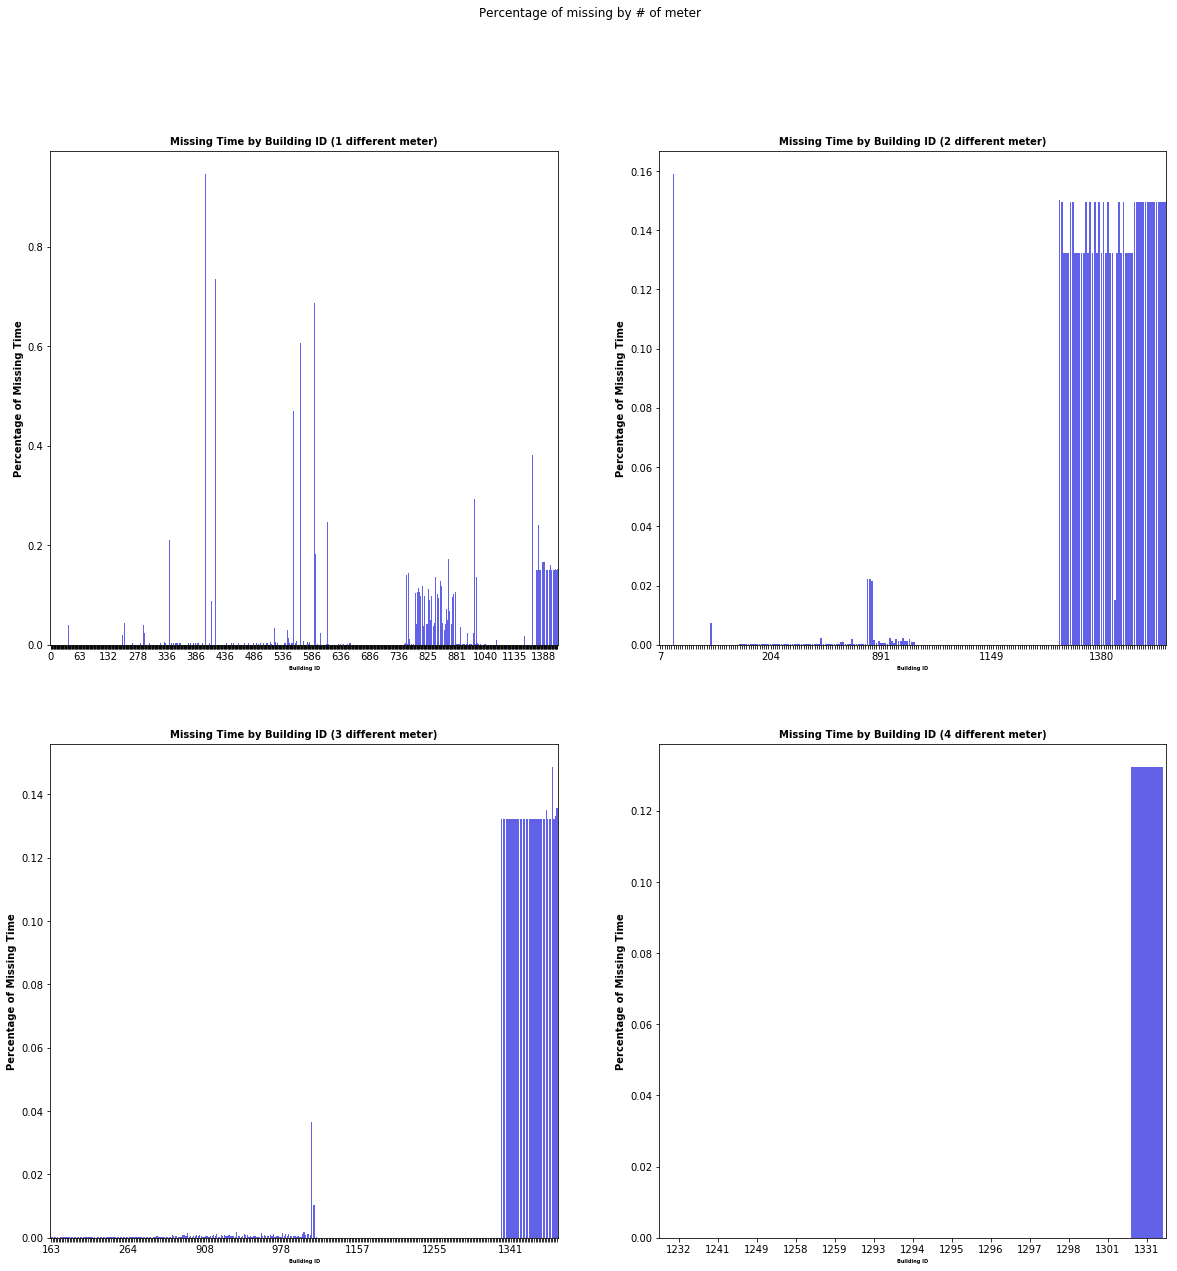

In [12]:
number_day = train['timestamp'].nunique()
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(20,20))

iteration = 1
for row in ax:
    for col in row:
        number_build_day = []
        build_filter = building_id[num_meter==iteration]
        for build in tqdm_notebook(build_filter):
            number_build_day += [(number_day-train.loc[train['building_id']==build,'timestamp'].nunique())/number_day]
        number_build_day = np.array(number_build_day)

        ax = sns.barplot(x=build_filter,y=number_build_day,color='blue',alpha=.7,ax = col)
        if len(number_build_day)>50:
            for ind, label in enumerate(ax.get_xticklabels()):
                if ind % 50 == 0:  
                    label.set_visible(True)
                else:
                    label.set_visible(False)
        ax.set_xlabel('Building ID',fontsize=5,fontweight='bold')
        ax.set_ylabel('Percentage of Missing Time',fontsize=10,fontweight='bold')
        ax.set_title("Missing Time by Building ID ({} different meter)".format(iteration), fontsize=10, fontweight='bold')

        iteration += 1

fig.suptitle('Percentage of missing by # of meter') 

plt.show()

In [13]:
train_meta =train.merge(building_metadata, left_on = "building_id", right_on = "building_id", how = "left")

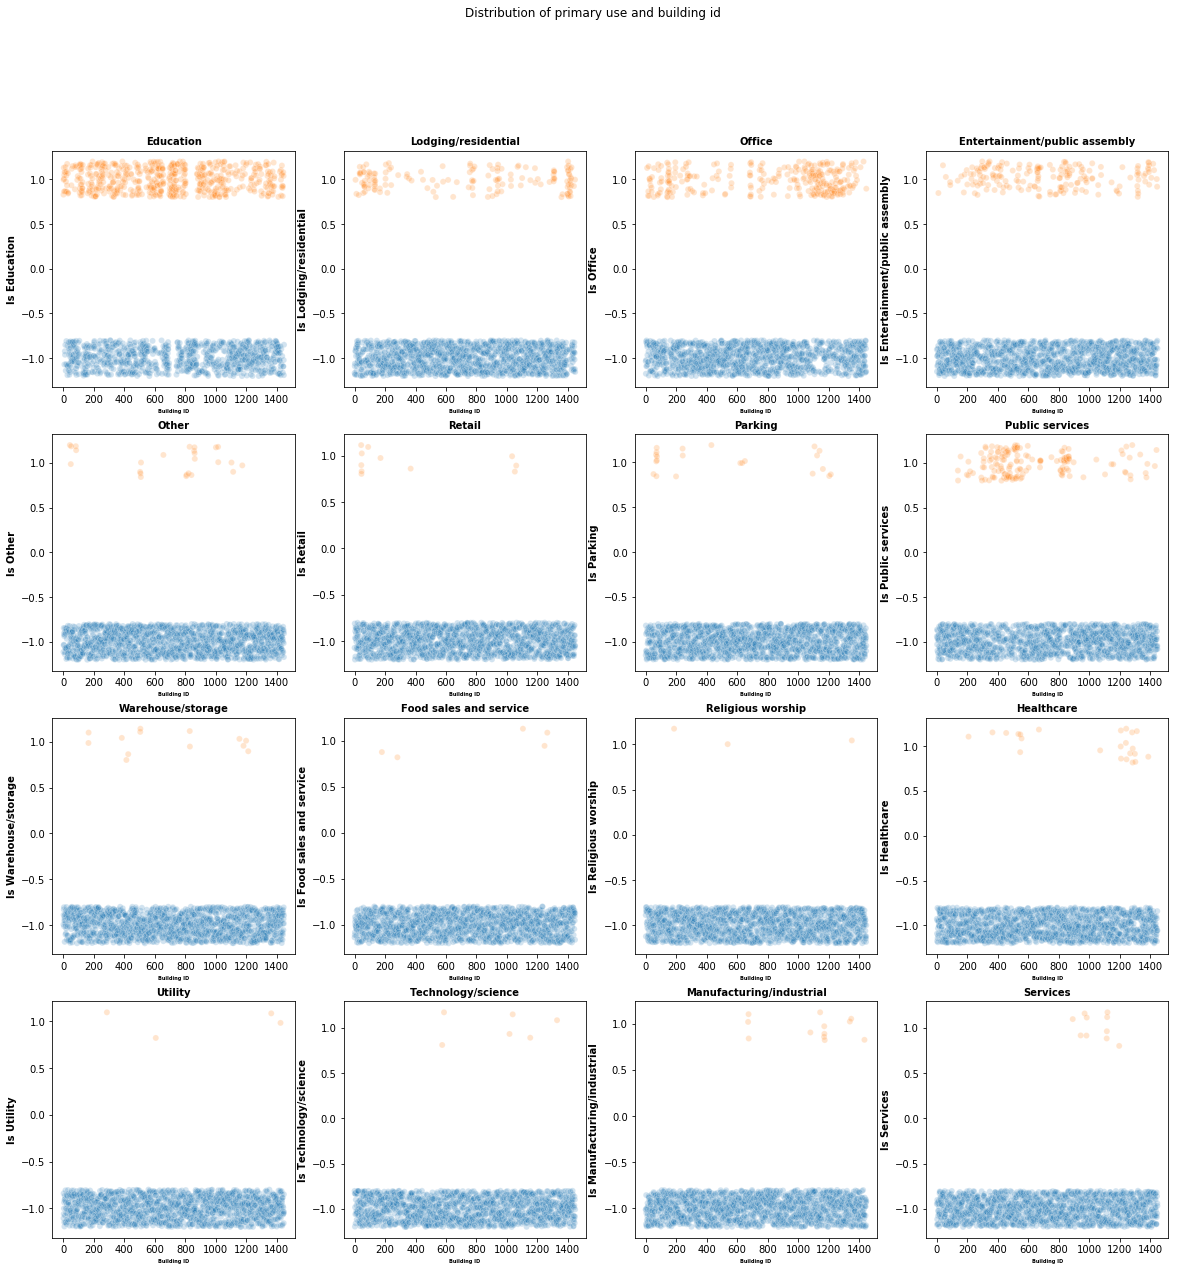

In [14]:
build_prim = train_meta[['building_id','primary_use']].drop_duplicates().sort_values(by='building_id',axis=0).copy()
primary = build_prim['primary_use'].unique()

fig, ax = plt.subplots(nrows=4, ncols=4,figsize=(20,20))

iteration = 0
for row in ax:
    for col in row:
        mask = build_prim['primary_use']==primary[iteration]
        g = sns.scatterplot(x=build_prim['building_id'],y =(mask).replace({False:-1,True:1}) + np.random.uniform(low=-.2,high=.2,size=len(mask)),
                        hue = mask, alpha=.2, ax =col)
        g.legend_.remove()
        
        g.set_xlabel('Building ID',fontsize=5,fontweight='bold')
        g.set_ylabel('Is {}'.format(primary[iteration]),fontsize=10,fontweight='bold')
        g.set_title("{}".format(primary[iteration]), fontsize=10, fontweight='bold')
        iteration += 1
fig.suptitle('Distribution of primary use and building id') 
plt.show()

[Text(0, 0, 'Education'),
 Text(0, 0, 'Lodging/residential'),
 Text(0, 0, 'Office'),
 Text(0, 0, 'Entertainment/public assembly'),
 Text(0, 0, 'Other'),
 Text(0, 0, 'Retail'),
 Text(0, 0, 'Parking'),
 Text(0, 0, 'Public services'),
 Text(0, 0, 'Warehouse/storage'),
 Text(0, 0, 'Food sales and service'),
 Text(0, 0, 'Religious worship'),
 Text(0, 0, 'Healthcare'),
 Text(0, 0, 'Utility'),
 Text(0, 0, 'Technology/science'),
 Text(0, 0, 'Manufacturing/industrial'),
 Text(0, 0, 'Services')]

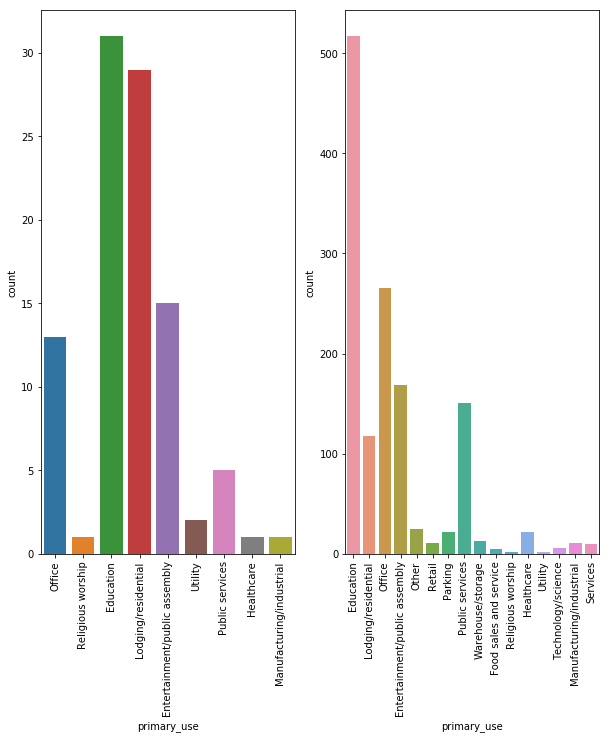

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(10,10))

g = sns.countplot(build_prim.loc[build_prim['building_id']>1350,'primary_use'],ax=ax[0])
tick = g.get_xticklabels()
g.set_xticklabels(tick,rotation=90)

g = sns.countplot(build_prim.loc[build_prim['building_id']<1350,'primary_use'],ax=ax[1])
tick = g.get_xticklabels()
g.set_xticklabels(tick,rotation=90)


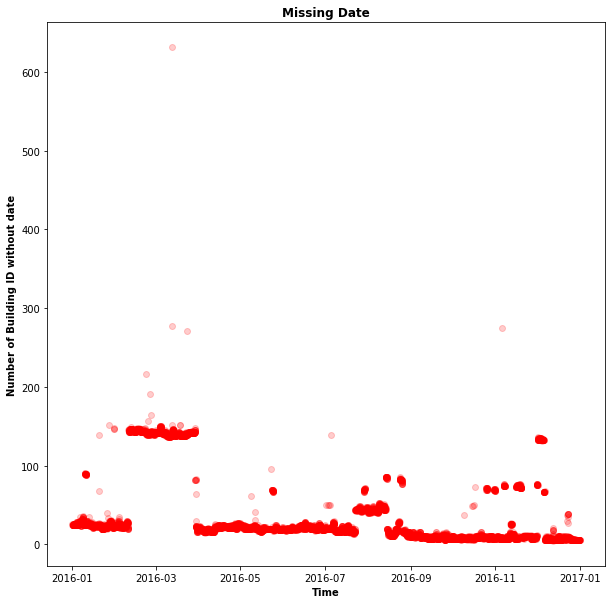

In [16]:
dates = matplotlib.dates.date2num(train['timestamp'].unique().copy())
date_len = len(train['building_id'].unique())

plt.figure(figsize=(10,10))

num_date = []
for dt in tqdm_notebook(train['timestamp'].unique()):
    num_date += [date_len-train[train['timestamp']==dt]['building_id'].nunique()]
num_date = np.array(num_date)


plt.plot_date(dates,num_date,color='red',alpha=.2)

# Add title and x, y labels
plt.title("Missing Date", fontweight='bold')
plt.xlabel("Time", fontweight='bold')
plt.ylabel("Number of Building ID without date", fontweight='bold')
plt.show()
